In [3]:
import sys, time
from emokit.emotiv import Emotiv
from emokit.packet import EmotivPacket

In [24]:
### Get a few seconds of data:
record_sensors = []
with Emotiv(display_output = False, is_research=True) as emotiv:
    packets_in_queue = 0
    while (emotiv.running) & (packets_in_queue < 1000):
        try:
            packet = emotiv.dequeue()
            if packet is not None:
                if type(packet) == EmotivPacket:
                    record_sensors.append(packet.sensors['AF4'].copy())
                    packets_in_queue += 1
            if((packets_in_queue > 0) & (packets_in_queue % 100 == 0)):
                print('100 packets collected.')
                print(record_sensors[-1])
            time.sleep(0.001)
        except Exception as ex:
            print("EmotivRender DequeuePlotError ", sys.exc_info()[0], sys.exc_info()[1], sys.exc_info()[2],
                  " : ", ex)

Initializing Emokit...
Initializing Reader Thread...
Initializing Writer Thread(s)...
Initializing Crypto Thread...
Initializing Output Thread...
Reader stopping...
Reader stopped...
Restarting Reader
Initializing Reader Thread...
Reader Thread Restarted
Reader stopping...
Reader stopped...
Restarting Reader
Initializing Reader Thread...
Reader Thread Restarted
100 packets collected.
{'quality': 3616, 'value': 212}
100 packets collected.
{'quality': 4168, 'value': 66}
100 packets collected.
{'quality': 3848, 'value': 6409}
100 packets collected.
{'quality': 7712, 'value': 1646}
100 packets collected.
{'quality': 4312, 'value': -2353}
100 packets collected.
{'quality': 4328, 'value': 1445}
100 packets collected.
{'quality': 4328, 'value': 1445}
100 packets collected.
{'quality': 4192, 'value': -1416}
100 packets collected.
{'quality': 4192, 'value': -2276}
100 packets collected.
{'quality': 4328, 'value': -1517}
100 packets collected.
{'quality': 4160, 'value': -956}
Reader stopping...C

In [25]:
import matplotlib.pyplot as plt

def plot_channel(record_sensors, sensor_id):
    channel_data = []
    for sensors in record_sensors:
        channel_data.append(sensors['value'])
    plt.plot(channel_data)
    plt.show()

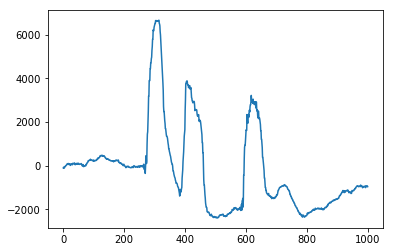

In [26]:
plot_channel(record_sensors,'AF4')

In [4]:
def record_channels(t):
    channels = 'AF3 F7 F3 FC5 T7 P7 O1 O2 P8 T8 FC6 F4 F8 AF4'.split(' ')
    record_sensors = dict()
    for ch in channels:
        record_sensors[ch]=[]
    with Emotiv(display_output = False, is_research=True) as emotiv:
        packets_in_queue = 0
        while (emotiv.running) & (packets_in_queue < t*128):
            try:
                packet = emotiv.dequeue()
                if packet is not None:
                    if type(packet) == EmotivPacket:
                        for ch in channels:
                            record_sensors[ch].append(packet.sensors[ch].copy())
                        packets_in_queue += 1
                if((packets_in_queue > 0) & (packets_in_queue % 100 == 0)):
                    print(packets_in_queue,'packets collected.')
                    #print(record_sensors[-1])
                time.sleep(0.001)
            except Exception as ex:
                print("EmotivRender DequeuePlotError ", sys.exc_info()[0], sys.exc_info()[1], sys.exc_info()[2],
                      " : ", ex)
    return(record_sensors)

In [12]:
record_sensors = record_channels(15)

Initializing Emokit...
Initializing Reader Thread...
Initializing Writer Thread(s)...
Initializing Crypto Thread...
Initializing Output Thread...
100 packets collected.
200 packets collected.
300 packets collected.
400 packets collected.
500 packets collected.
600 packets collected.
700 packets collected.
800 packets collected.
900 packets collected.
1000 packets collected.
1100 packets collected.
1200 packets collected.
1300 packets collected.
1400 packets collected.
1500 packets collected.
1600 packets collected.
1700 packets collected.
1800 packets collected.
1900 packets collected.
Reader stopping...
Reader stopped...Crypto thread stopping.



In [13]:
import matplotlib.pyplot as plt

def plot_channel(record_sensors, sensor_ids):
    for sensor_id in sensor_ids:
        channel_data = []
        for val in record_sensors[sensor_id]:
            channel_data.append(val['value'])
        plt.plot(channel_data)
        plt.title(sensor_id)
        plt.show()

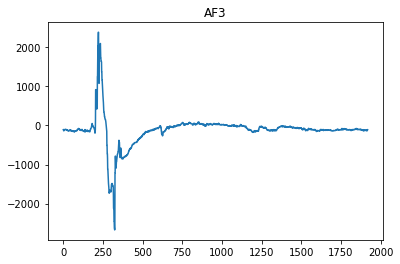

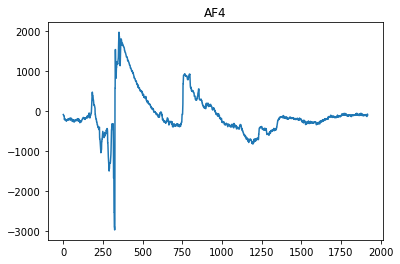

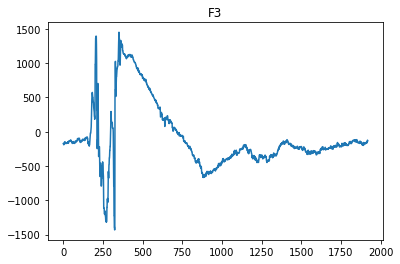

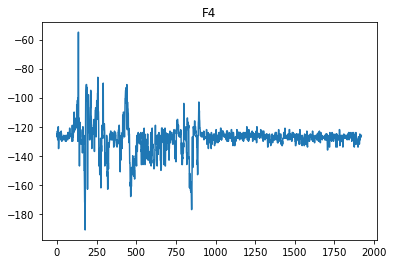

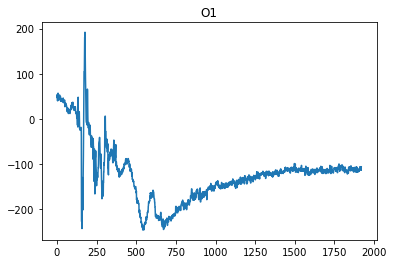

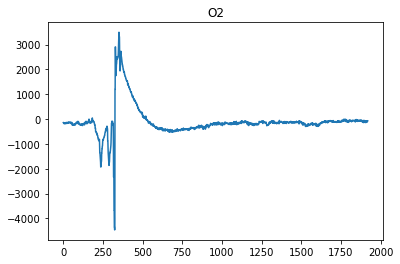

In [14]:
plot_channel(record_sensors,['AF3','AF4','F3','F4','O1','O2',])

In [18]:
from pickle import dump
with open('6_channel.pkl','wb') as f:
    dump(record_sensors, f)